<Axes: >

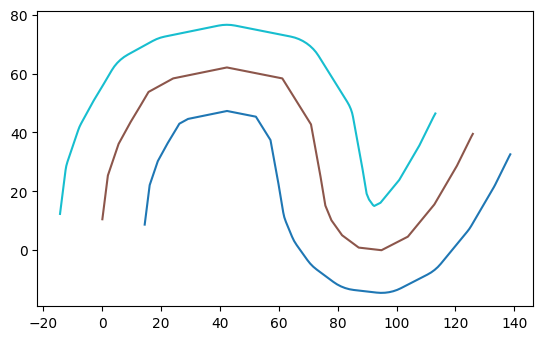

In [1]:
import sys, pickle, os
sys.path.insert(0, "C:\\Users\\adria\\Documents\\Mestrado\\texture_codes\\modules")

import geopandas as gpd
import background_generation as backgen

root_dir ="C:\\Users\\adria\\Documents\\Mestrado\\texture_codes\\modules"

img_dir = root_dir + '\\Imagens\\vessel_data\\images'
#Varrendo o diretório
filenames = []
for filename in os.listdir(img_dir):    
  filenames.append(filename.split('.')[0])
filenames = filenames[:20]

#Lendo o pickle e gerando o vessel_map
idx = 1
pickle_dir = f'{root_dir}\\Vessel_Models_pickle'
path = (pickle_dir + f'\\{filenames[idx]}_savedata1.pickle')
arquivo = pickle.load(open(path, 'rb'))
vessel_map = arquivo['vessel_model'].vessel_map
mapa_original = vessel_map.mapped_values

#Lendo o Json
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/arquivo_quatro_pontos.json'
arquivo = f'{root_dir}\\Artificial_Lines\\teste_31_05.json'
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/teste2_31_05.json'
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/teste.json'

medial_path = backgen.retorna_paths(arquivo)
caminhos_transladados_interpolado = backgen.retorna_caminhos_transladados(medial_path[0], 2)

linha_central,linha_offset_esquerda,linha_offset_direita, maior_tamanho = backgen.retorna_linhas_offset_posicao_tamanho(mapa_original,caminhos_transladados_interpolado[0])

gp4 = gpd.GeoSeries([linha_offset_esquerda, linha_central, linha_offset_direita])
gp4.plot(cmap="tab10")


**Plotando os pontos**

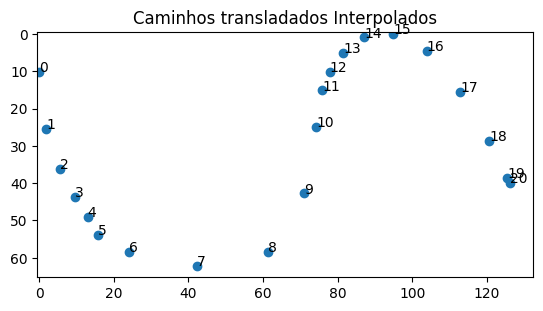

In [2]:
pontos_x = caminhos_transladados_interpolado[0][:,0]
pontos_y = caminhos_transladados_interpolado[0][:,1]
backgen.plotar_pontos(pontos_x, pontos_y, 'Caminhos transladados Interpolados' )